# Project 2 - Using Feed-Forward Neural Networks for linear and logistic regression
## **Part d)** - Classification analysis with FFNN
#### Program imports and defaults

In [44]:
from networkClasses import *
from classSupport import *
from methodSupport import *

import autograd.numpy as anp
from autograd import grad,elementwise_grad
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt

from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate

import pandas as pd

## Random seed
def_seed = 1
np.random.seed(def_seed); anp.random.seed(def_seed)

## Figure defaults
plt.rcParams["figure.figsize"] = (8,3); plt.rcParams["font.size"] = 10

### Wisconsin Breast Cancer Dataset and Neural Network
#### Data preprocessing

In [45]:
anp.random.seed(def_seed)

cancer =  load_breast_cancer() #load_iris()
cancerpd = pd.DataFrame(cancer.data, columns=cancer.feature_names)

inputs = cancer.data; targets = cancer.target
'''
num = 15
height = anp.random.normal(1.85,0.075,num)
weight = anp.random.normal(90,25,num)
print(height)
print(weight)

dataset = anp.zeros((num,2))
dataset[:,0] = height
dataset[:,1] = weight
print(dataset)
inputs = dataset
targets = dataset[:,1]/dataset[:,0]
print(targets)
targets = np.zeros((len(inputs), len(cancer.target_names)))
for i, t in enumerate(cancer.target):
    targets[i, t] = 1

    #'''
print('Target matrix shape:',targets.shape)
print('Input data shape:',inputs.shape)
print('Target names:',cancer.target_names)

#print(cancer.feature_names)
## Train-test splitting
test_size = 1/5
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs,targets,
                                                        test_size=test_size,random_state=def_seed)
#inputs_train, inputs_test, targets_train, targets_test = inputs,inputs,targets,targets
## Data scaling
scaler = StandardScaler()
scaler.fit(inputs_train)
inputs_train_s = scaler.transform(inputs_train)
inputs_test_s = scaler.transform(inputs_test)
#print(scaler.mean_)
#print(scaler.var_)
print(inputs_test[:5,:5])
print(inputs_test_s[:5,:5])

Target matrix shape: (569,)
Input data shape: (569, 30)
Target names: ['malignant' 'benign']
[[1.469e+01 1.398e+01 9.822e+01 6.561e+02 1.031e-01]
 [1.317e+01 1.866e+01 8.598e+01 5.346e+02 1.158e-01]
 [1.295e+01 1.602e+01 8.314e+01 5.137e+02 1.005e-01]
 [1.831e+01 1.858e+01 1.186e+02 1.041e+03 8.588e-02]
 [1.513e+01 2.981e+01 9.671e+01 7.195e+02 8.320e-02]]
[[ 0.1318529  -1.22289689  0.22619275 -0.02342069  0.49000614]
 [-0.28874137 -0.15799931 -0.26406701 -0.35886667  1.41492503]
 [-0.34961686 -0.75871076 -0.3778201  -0.41656891  0.30065266]
 [ 1.13353136 -0.17620269  1.04249128  1.03923905 -0.76409649]
 [ 0.25360387  2.3790964   0.16571136  0.15161861 -0.95927622]]


#### Covariance matrix for the dataset

In [46]:
corr_matrix = cancerpd.corr().round(1)
'''
EigVals, EigVecs = anp.linalg.eig(corr_matrix)
print(EigVals)
permute = EigVals.argsort()
EigVals = EigVals[permute]
EigVecs = EigVecs[:,permute]
print(EigVals)
print(EigVecs[:,0])
'''
show = False
if show == True:
    fig,ax = plt.subplots(1,1,figsize=(12,8))
    ax = sns.heatmap(corr_matrix,annot=True)
    
    fig, axes = plt.subplots(15,2,figsize=(10,20))
    malignant = cancer.data[cancer.target == 0]
    benign = cancer.data[cancer.target == 1]
    ax = axes.ravel()

    for i in range(30):
        _, bins = np.histogram(cancer.data[:,i], bins =50)
        ax[i].hist(malignant[:,i], bins = bins, alpha = 0.5)
        ax[i].hist(benign[:,i], bins = bins, alpha = 0.5)
        ax[i].set_title(cancer.feature_names[i])
        ax[i].set_yticks(())
    ax[0].set_xlabel("Feature magnitude")
    ax[0].set_ylabel("Frequency")
    ax[0].legend(["Malignant", "Benign"], loc ="best")
    fig.tight_layout()
    plt.show()

#### Network setup

(eta,lmbda) 0.0001 1e-06
Prediction accuracy: 0.7456140350877193
Loss: 0.7102848663894218
29.18782740911486
[[ 1.  0.  1. ...  1.  1.  1.]
 [ 1.  0.  1. ...  1.  1.  1.]
 [ 0. -1.  0. ...  0.  0.  0.]
 ...
 [ 1.  0.  1. ...  1.  1.  1.]
 [ 0. -1.  0. ...  0.  0.  0.]
 [ 0. -1.  0. ...  0.  0.  0.]]


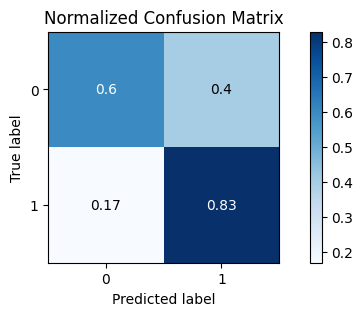

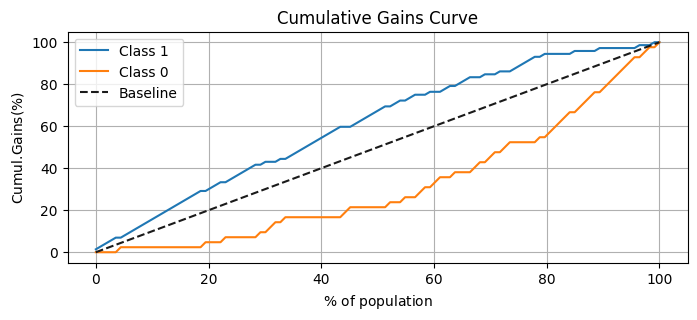

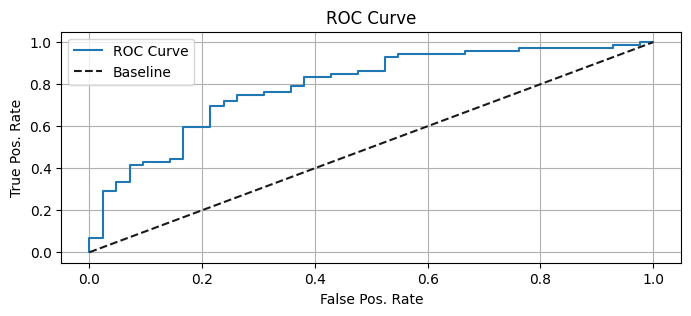

In [47]:
anp.random.seed(def_seed)

n_inputs,n_features = inputs_train_s.shape

layer_output_sizes = [15,5,1]

hidden_func  = sigmoid #sigmoid, ReLU, expReLU, LeakyReLU, identity, tanh
hidden_der = sigmoid_der #elementwise_grad(hidden_func)
#hidden_der = elementwise_grad(hidden_func)

act_funcs = []; act_ders = []
for i in range(len(layer_output_sizes)-1):
    act_funcs.append(hidden_func)
    act_ders.append(hidden_der)
act_funcs.append(sigmoid); 
output_der = sigmoid_der #elementwise_grad(act_funcs[-1]); 
#output_der = elementwise_grad(act_funcs[-1]); 
act_ders.append(output_der)

cost_func = log_loss
cost_der  = log_loss_der #grad(cost_func,0)

network_cl = FFNeuralNework(network_input_size=n_features,layer_output_size=layer_output_sizes,
                            activation_functions=act_funcs,activation_derivatives=act_ders,
                            cost_function=cost_func,cost_derivative=cost_der,random_state=def_seed)

network_cl.create_layers()

## Gradient Descent setup
eta = 1e-4
gamma = 0.000001
lmbda = 1e-6; lp = 2
gamma = 0.00001
decay = 0.009

batches = 5; epoch = 1000

## Calling the gradient descent (GD)-method
#GDMethod = [PlainGD(eta,lmbda=lmbda,lp=lp),PlainGD(eta,lmbda=lmbda,lp=lp)]
#GDMethod = [MomentumGD(eta,gamma,lmbda=lmbda,lp=lp),MomentumGD(eta,gamma,lmbda=lmbda,lp=lp)]
#GDMethod = [Adagrad(eta,gamma,lmbda,lp=lp),Adagrad(eta,gamma,lmbda,lp=lp)]
GDMethod = [RMSprop(eta,decay=decay),RMSprop(eta,decay=decay)]
#GDMethod = [ADAM(eta),ADAM(eta)]


network_cl.train_network(input=inputs_train_s,target=targets_train,GDMethod=GDMethod,
                                batches=batches,epochs=epoch)

final_prediction = network_cl.predict(inputs_test_s,binary=False)
final_prediction_bin = np.zeros_like(final_prediction)
for k in range(len(final_prediction)):
    if final_prediction[k] >= 0.5:
        final_prediction_bin[k] = 1

acc = accuracy_score(targets_test,final_prediction_bin)#network_cl.accuracy(final_prediction,targets=targets_test#print('(eta,gamma)',eta[i],gamma[j])
print('(eta,lmbda)',eta,lmbda)
print('Prediction accuracy:',acc)
print('Loss:',network_cl.cost(inputs_test_s,targets_test))
mse_train = mse_predict(final_prediction,targets_test)
print(mse_train)

print(targets_test-final_prediction_bin)
ax = confusion_roc_cumul_gains(targets_test,final_prediction[:,0])

#print('Prediction accuracy:',acc)

#### Repeated training with the same parameters as above

In [48]:
anp.random.seed(def_seed); network_cl.reset()
show = False

layer_output_sizes = [5,1]

hidden_func  = sigmoid #sigmoid, ReLU, expReLU, LeakyReLU, identity, tanh
#hidden_der = sigmoid_der #elementwise_grad(hidden_func)
hidden_der = elementwise_grad(hidden_func)

act_funcs = []; act_ders = []
for i in range(len(layer_output_sizes)-1):
    act_funcs.append(hidden_func)
    act_ders.append(hidden_der)
act_funcs.append(sigmoid); 
output_der = sigmoid_der #elementwise_grad(act_funcs[-1]); 
#output_der = elementwise_grad(act_funcs[-1]); 
act_ders.append(output_der)

cost_func = log_loss
cost_der  = log_loss_der #grad(cost_func,0)

network_cl = FFNeuralNework(network_input_size=n_features,layer_output_size=layer_output_sizes,
                            activation_functions=act_funcs,activation_derivatives=act_ders,
                            cost_function=cost_func,cost_derivative=cost_der,random_state=def_seed)

network_cl.create_layers()

## Gradient Descent setup
eta = 1e-4
gamma = 0.000001
lmbda = 1e-6; lp = 2
gamma = 0.00001
decay = 0.009

batches = 5; epoch = 1000

## Calling the gradient descent (GD)-method
#GDMethod = [PlainGD(eta,lmbda=lmbda,lp=lp),PlainGD(eta,lmbda=lmbda,lp=lp)]
#GDMethod = [MomentumGD(eta,gamma,lmbda=lmbda,lp=lp),MomentumGD(eta,gamma,lmbda=lmbda,lp=lp)]
#GDMethod = [Adagrad(eta,gamma,lmbda,lp=lp),Adagrad(eta,gamma,lmbda,lp=lp)]
GDMethod = [RMSprop(eta,decay=decay),RMSprop(eta,decay=decay)]
#GDMethod = [ADAM(eta),ADAM(eta)]

loss = 1; tol = 0.05; iter = 0
acc = 0; tol_acc = 0.975
#while loss > tol and iter < 1000:
while acc < tol_acc and iter < 1000:

    network_cl.train_network(input=inputs_train_s,target=targets_train,GDMethod=GDMethod,
                                batches=batches,epochs=epoch)

    final_prediction_train = network_cl.predict(inputs_train_s)
    final_prediction = network_cl.predict(inputs_test_s) 
    
    loss = network_cl.cost(inputs_train_s,targets_train)
    mse_train = mse_predict(final_prediction_train,targets_train)
    final_prediction_bin_train = np.zeros_like(final_prediction_train)
    final_prediction_bin = np.zeros_like(final_prediction)
    for k in range(len(final_prediction_train)):
        if final_prediction_train[k] >= 0.5:
            final_prediction_bin_train[k] = 1
    for k in range(len(final_prediction)):
        if final_prediction[k] >= 0.5:
            final_prediction_bin[k] = 1
    acc_train = accuracy_score(targets_train,final_prediction_bin_train)
    acc = accuracy_score(targets_test,final_prediction_bin)

    iter += 1
    if iter % 50 == 0:
        print(iter)
        print(loss)
        print(acc)

final_prediction = network_cl.predict(inputs_test_s,binary=False)
final_prediction_bin = np.zeros_like(final_prediction)
for k in range(len(final_prediction)):
    if final_prediction[k] >= 0.5:
        final_prediction_bin[k] = 1

acc = accuracy_score(targets_test,final_prediction_bin)#network_cl.accuracy(final_prediction,targets=targets_test#print('(eta,gamma)',eta[i],gamma[j])
print('(eta,lmbda)',eta,lmbda)
print('Prediction accuracy:',acc)
print('Final loss:',network_cl.cost(inputs_test_s,targets_test))

#print(final_prediction)

ax = confusion_roc_cumul_gains(targets_test,final_prediction[:,0])

50
0.7114683624993935
0.7807017543859649
100
0.7114765390199363
0.7807017543859649


KeyboardInterrupt: 

#### Parameter study, $\eta$, $\lambda$, $\gamma$

In [6]:
anp.random.seed(def_seed); network_cl.reset()
show = False


## Gradient Descent setup
num_param = 3
eta = anp.logspace(-4,0,num_param)
#gamma = anp.logspace(-10,-4,num_param)
gamme = 0.0#001
lmbda = anp.logspace(-6,-3,num_param)

lp = 2
batches = 10; epoch = 500

LOSS = anp.zeros((len(eta),len(lmbda)))
#LOSS = np.zeros((len(eta),len(gamma)))
ACC = anp.zeros_like(LOSS)
for i in range(len(eta)):
    #for j in range(len(gamma)):
    for j in range(len(lmbda)):

        ## Recreating the layers
        network_cl.create_layers()

        ## Calling the gradient descent (GD)-method
        #GDMethod = [PlainGD(eta[i],lmbda=lmbda[j],lp=lp),PlainGD(eta[i],lmbda=lmbda[j],lp=lp)]
        #GDMethod = [MomentumGD(eta[i],gamma[j],lmbda=lmbda,lp=lp),MomentumGD(eta[i],gamma[j],lmbda=lmbda,lp=lp)]
        GDMethod = [MomentumGD(eta[i],gamma,lmbda=lmbda[j],lp=lp),MomentumGD(eta[i],gamma,lmbda=lmbda[j],lp=lp)]


        network_cl.train_network(input=inputs_train_s,target=targets_train,GDMethod=GDMethod,
                                batches=batches,epochs=epoch)

        final_prediction = network_cl.predict(inputs_test_s,binary=False)
        final_prediction_bin = np.zeros_like(final_prediction)
        
        ## Creating a binary array for the accuracy score
        for k in range(len(final_prediction)):
            if final_prediction[k] >= 0.5:
                final_prediction_bin[k] = 1

        LOSS[i,j] = network_cl.cost(inputs_test_s,targets_test)
        ACC[i,j]  = accuracy_score(targets_test,final_prediction_bin)

        if show == True:
            print(f'{GDMethod[0].__class__.__name__}')
            #print('(eta,gamma)',eta[i],gamma[j])
            print('(eta,lmbda)',eta[i],lmbda[j])
            print('Prediction accuracy:',acc)
            print('Loss:',network_cl.cost(inputs_test_s,targets_test))

        network_cl.reset()

fig,ax = lambda_eta(LOSS,[lmbda,eta],
                    axis_tick_labels=[[f'{y:.0e}' for y in lmbda],[f'{y:.0e}' for y in eta]],
                    cbar_lim=[0.,2.]
                    )
fig,bx = lambda_eta(ACC,[lmbda,eta],
                    axis_tick_labels=[[f'{y:.0e}' for y in lmbda],[f'{y:.0e}' for y in eta]],
                    cbar_lim=[0.,2.]
                    )


TypeError: FFNeuralNework.train_network() got an unexpected keyword argument 'auto_cost'

### Scikit-learn `MLPClassifier`-class

[1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
0.9861111111111112
73
logistic
0.013888888888888888


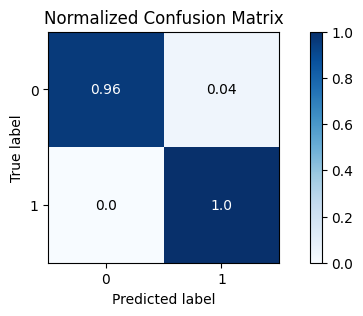

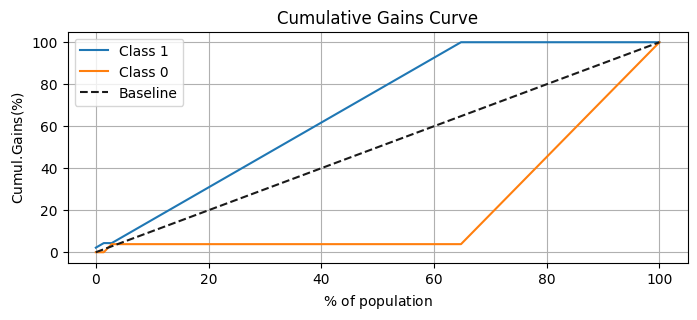

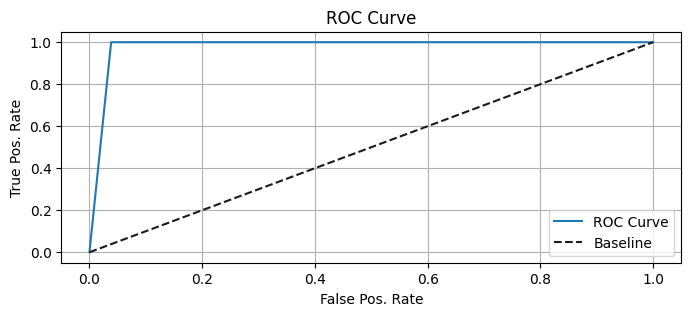

In [10]:
from sklearn.neural_network import MLPClassifier
layer_output_sizes_sci = [15,15,1]; lmbda = 1e-3
network = MLPClassifier(layer_output_sizes_sci,learning_rate_init=1,
                        activation='logistic',alpha=lmbda,batch_size=100,
                        solver='sgd',random_state=def_seed,max_iter=2000)

network.fit(inputs_train_s,targets_train)
final_pred = network.predict(inputs_test_s)
print(final_pred)
print(network.score(inputs_test_s,targets_test))
print(network.n_iter_)
print(network.out_activation_)

ax = confusion_roc_cumul_gains(targets_test,final_pred)
print(mse_predict(final_pred,targets_test))